In [ ]:
!pip install sentinelsat

     |████████████████████████████████| 48 kB 1.8 MB/s 


In [ ]:
!pip install eo-learn

     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 10.5 MB 10.9 MB/s 
     |████████████████████████████████| 199 kB 54.0 MB/s 
     |████████████████████████████████| 131 kB 40.1 MB/s 
     |████████████████████████████████| 994 kB 53.6 MB/s 
     |████████████████████████████████| 131 kB 55.7 MB/s 
     |████████████████████████████████| 43.3 MB 16 kB/s 
     |████████████████████████████████| 19.3 MB 1.5 MB/s 
     |████████████████████████████████| 994 kB 71.8 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 51.7 MB/s 
     |████████████████████████████████| 8.0 MB 29.7 MB/s 
     |████████████████████████████████| 123 kB 61.1 MB/s 
     |████████████████████████████████| 79 kB 7.7 MB/s 
     |████████████████████████████████| 127 kB 51.7 MB/s 
     |████████████████████████████████| 47 kB 4.8 MB/s 
     |████████████████████████████████| 44 kB 2.4 MB/s 
     |█████████████████

In [ ]:
!pip install sentinelhub

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

from sentinelhub import WebFeatureService
from sentinelhub import SHConfig, SentinelHubRequest
from sentinelhub import MimeType
from sentinelhub import BBox, CRS, DataCollection

from eolearn.core import LinearWorkflow, FeatureType
from eolearn.core import SaveTask, LoadTask, FeatureType, LinearWorkflow
from eolearn.io import SentinelHubInputTask, SentinelHubDemTask, SentinelHubEvalscriptTask, get_available_timestamps
from eolearn.mask import AddValidDataMaskTask


/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):


In [ ]:
!sentinelhub.config --instance_id 3b1f4dd6-95b7-4aca-9612-5a45db424952
!sentinelhub.config --show

The value of parameter 'instance_id' was updated to '3b1f4dd6-95b7-4aca-9612-5a45db424952'
{
  "instance_id": "3b1f4dd6-95b7-4aca-9612-5a45db424952",
  "sh_client_id": "",
  "sh_client_secret": "",
  "sh_base_url": "https://services.sentinel-hub.com",
  "sh_auth_base_url": "https://services.sentinel-hub.com",
  "geopedia_wms_url": "https://service.geopedia.world",
  "geopedia_rest_url": "https://www.geopedia.world/rest",
  "aws_access_key_id": "",
  "aws_secret_access_key": "",
  "aws_metadata_url": "https://roda.sentinel-hub.com",
  "aws_s3_l1c_bucket": "sentinel-s2-l1c",
  "aws_s3_l2a_bucket": "sentinel-s2-l2a",
  "opensearch_url": "http://opensearch.sentinel-hub.com/resto/api/collections/Sentinel2",
  "max_wfs_records_per_query": 100,
  "max_opensearch_records_per_query": 500,
  "max_download_attempts": 4,
  "download_sleep_time": 5.0,
  "download_timeout_seconds": 120.0,
  "number_of_download_processes": 1
}
Configuration file location: /usr/local/lib/python3.7/dist-packages/sentin

In [ ]:
#instance ID
CLIENT_ID = '3b1f4dd6-95b7-4aca-9612-5a45db424952'
# client id
#CLIENT_ID = '3808b264-43e3-4182-a0af-da6e29c19ac2'
CLIENT_SECRET = 'uMIeS+e@}2BDk6y9BiSmmhYyw>EYv[Khx-q:B*}R'

config = SHConfig()
if CLIENT_ID and CLIENT_SECRET:
  config.instance_id = CLIENT_ID
  config.sh_client_id = CLIENT_ID
  config.sh_client_secret = CLIENT_SECRET

In [ ]:
for collection in DataCollection.get_available_collections():
  print(collection)

DataCollection.SENTINEL2_L1C
DataCollection.SENTINEL2_L2A
DataCollection.SENTINEL1
DataCollection.SENTINEL1_IW
DataCollection.SENTINEL1_IW_ASC
DataCollection.SENTINEL1_IW_DES
DataCollection.SENTINEL1_EW
DataCollection.SENTINEL1_EW_ASC
DataCollection.SENTINEL1_EW_DES
DataCollection.SENTINEL1_EW_SH
DataCollection.SENTINEL1_EW_SH_ASC
DataCollection.SENTINEL1_EW_SH_DES
DataCollection.DEM
DataCollection.DEM_MAPZEN
DataCollection.DEM_COPERNICUS_30
DataCollection.DEM_COPERNICUS_90
DataCollection.MODIS
DataCollection.LANDSAT_MSS_L1
DataCollection.LANDSAT_TM_L1
DataCollection.LANDSAT_TM_L2
DataCollection.LANDSAT_ETM_L1
DataCollection.LANDSAT_ETM_L2
DataCollection.LANDSAT_OT_L1
DataCollection.LANDSAT_OT_L2
DataCollection.SENTINEL5P
DataCollection.SENTINEL3_OLCI
DataCollection.SENTINEL3_SLSTR


In [ ]:
DataCollection.SENTINEL2_L1C

<DataCollection.SENTINEL2_L1C: DataCollectionDefinition(
  api_id: sentinel-2-l1c
  catalog_id: sentinel-2-l1c
  wfs_id: DSS1
  service_url: https://services.sentinel-hub.com
  collection_type: Sentinel-2
  sensor_type: MSI
  processing_level: L1C
  bands: ('B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12')
  is_timeless: False
  has_cloud_coverage: True
)>

In [ ]:
# Great Pacific Garbage Patch(GPGP)
#roi_bbox = BBox(bbox=[38.00, -145.00, 39.3, -145.4], crs=CRS.WGS84)
# Arabian Sea
roi_bbox = BBox(bbox=[12.2502, 64.3372, 13.50, 64.75], crs=CRS.WGS84)
# Glacier (documentaion example)
#roi_bbox = BBox(bbox=[-147.8, 60.96, -147.65, 60.91], crs=CRS.WGS84)
time_interval = ('2016-01-01', '2021-10-01')

# maximal cloud coverage (based on Sentinel-2 provided tile metadata)
maxcc = .05

# resolution of the request (in metres)
resolution = 20

# time difference parameter (minimum allowed time difference; if two observations are closer than this, they will be mosaicked into one observation)
time_difference = datetime.timedelta(hours=2)

In [ ]:
def is_valid(eopatch):
  return eopatch.mask['dataMask'].astype(bool) & ~(eopatch.mask['CLM'].astype(bool))

In [ ]:
evalscript_true_color = """
//VERSION=3

function setup() {
    return {
        input: [{
            bands: ["B04","B05","B08","B11"],
            units: "DN"
        }],
        output: {
            bands: 4,
            sampleType: "INT16"
        }
    };
}

function evaluatePixel(sample) {
    return [sample.B04,
            sample.B05,
            sample.B08,
            sample.B11];
}
"""

In [ ]:
evalscript_all_bands = """
//VERSION=3

function setup() {
    return {
        input: [{
            bands: ["B01","B02","B03","B04","B05","B06","B07","B08","B8A","B09","B10","B11","B12"],
            units: "DN"
        }],
        output: {
            bands: 13,
            sampleType: "INT16"
        }
    };
}

function evaluatePixel(sample) {
    return [sample.B01,
                sample.B02,
                sample.B03,
                sample.B04,
                sample.B05,
                sample.B06,
                sample.B07,
                sample.B08,
                sample.B8A,
                sample.B09,
                sample.B10,
                sample.B11,
                sample.B12];
}
"""

In [ ]:
indices_evalscript = """
//VERSION=3

function setup() {
    return {
        input: [{
            bands: ['B03', 'B04', 'B08', "dataMask"]
        }],
        output: [{
            id: "indices",
            bands: 3,
            sampleType: SampleTyle.FLOAT32
        }]
    };
}

function evaluatePixel(sample) {
    let ndvi = index(sample.B08, sample.B04)
    let ndwi = index(sample.B03, sample.B08)
    return {indices: [ndvi, ndwi]};
}
"""

In [ ]:
def GetNDVI(img_b04, img_b08):
  return (img_b08-img_b04)/(img_b08+img_b04)

In [ ]:
def GetFDI(b04, b05, b08, b11):
  wv_len = 1.636
  fdi = b08 - (b05 + (b11 - b05)*wv_len*10)
  return fdi

In [ ]:
request = SentinelHubRequest(
    evalscript = evalscript_all_bands,
    input_data = [
        SentinelHubRequest.input_data(
        data_collection=DataCollection.SENTINEL2_L1C,
        time_interval=time_interval,
        mosaicking_order='leastCC',
        maxcc=maxcc
        )
    ],
    responses = [
                 SentinelHubRequest.output_response('default', MimeType.TIFF)
    ],
    bbox=roi_bbox,
    size=(1000, 1000),
    config=config
)

image = request.get_data()[0]

In [ ]:
request.get_data()[0].shape

(1000, 1000, 13)

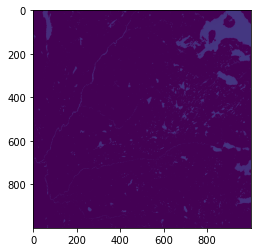

In [ ]:
image_B04 = request.get_data()[0][:, :, 3]
image_B08 = request.get_data()[0][:, :, 7]

image_ndvi = GetNDVI(image_B04, image_B08)

plt.imshow(image_ndvi)

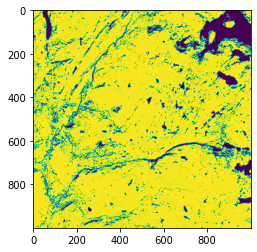

In [ ]:
image_B04 = request.get_data()[0][:, :, 3]
image_B05 = request.get_data()[0][:, :, 4]
image_B08 = request.get_data()[0][:, :, 7]
image_B11 = request.get_data()[0][:, :, 11]

image_fdi = GetFDI(image_B04, image_B05, image_B08, image_B11)

plt.imshow(image_fdi)

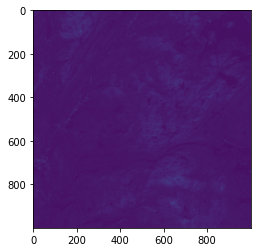

In [ ]:
plt.imshow(request.get_data()[0][:, :, 1])

In [ ]:
# Great Pacific Garbage Patch(GPGP)
#roi_bbox = BBox(bbox=[38.00, -145.00, 39.3, -145.4], crs=CRS.WGS84)
# Arabian Sea
roi_bbox = BBox(bbox=[12.2502, 64.3372, 13.50, 64.75], crs=CRS.WGS84)
time_interval = ('2020-07-01', '2021-10-01')

CLIENT_ID = '3808b264-43e3-4182-a0af-da6e29c19ac2'
CLIENT_SECRET = 'uMIeS+e@}2BDk6y9BiSmmhYyw>EYv[Khx-q:B*}R'

config = SHConfig()
if CLIENT_ID and CLIENT_SECRET:
  config.instance_id = CLIENT_ID
  config.sh_client_id = CLIENT_ID
  config.sh_client_secret = CLIENT_SECRET

In [ ]:
wfs_iterator = WebFeatureService(
    roi_bbox, # bbox=[-147.8, 60.96, -146.5, 61.38]
    time_interval, # '2016-01-01', '2021-10-01'
    data_collection=DataCollection.SENTINEL2_L1C,
    maxcc=0.05,
    config=config
)

results = list(wfs_iterator)
print('Total number of results:', len(results))

Total number of results: 29


In [ ]:
def GetImage(satellite, time_interval, bbox, size, config):
  request = SentinelHubRequest(
    evalscript = evalscript_all_bands,
    input_data = [
        SentinelHubRequest.input_data(
        data_collection=satellite,
        time_interval=time_interval,
        )
    ],
    responses = [
                SentinelHubRequest.output_response('default', MimeType.TIFF)
    ],
    bbox=roi_bbox,
    size=(1000, 1000),
    config=config)
  image = request.get_data()[0]
  return image

In [ ]:
CLIENT_ID = '3b1f4dd6-95b7-4aca-9612-5a45db424952'
#CLIENT_ID = '3808b264-43e3-4182-a0af-da6e29c19ac2'
CLIENT_SECRET = 'uMIeS+e@}2BDk6y9BiSmmhYyw>EYv[Khx-q:B*}R'

config.instance_id = CLIENT_ID
config.sh_client_id = CLIENT_ID
config.sh_client_secret = CLIENT_SECRET

In [ ]:
dates = []
geometries = []
properties = []
images = []
ndvi = []
fdi = []

for result in results:
  current_date = result['properties']['date']
  current_date = datetime.datetime.strptime(current_date, '%Y-%m-%d')
  date = (current_date, current_date + datetime.timedelta(days=1))
  size = (2500, 2500)
  image = GetImage(DataCollection.SENTINEL2_L1C, date, roi_bbox, size, config)

  image_B04 = image[:, :, 3]
  image_B05 = image[:, :, 4]
  image_B08 = image[:, :, 7]
  image_B11 = image[:, :, 11]

  image_ndvi = GetNDVI(image_B04, image_B08)
  image_fdi = GetFDI(image_B04, image_B05, image_B08, image_B11)
  dates.append(current_date)
  geometries.append(result['geometry'])
  properties.append(result['properties'])
  images.append(image)
  ndvi.append(image_ndvi)
  fdi.append(image_fdi)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


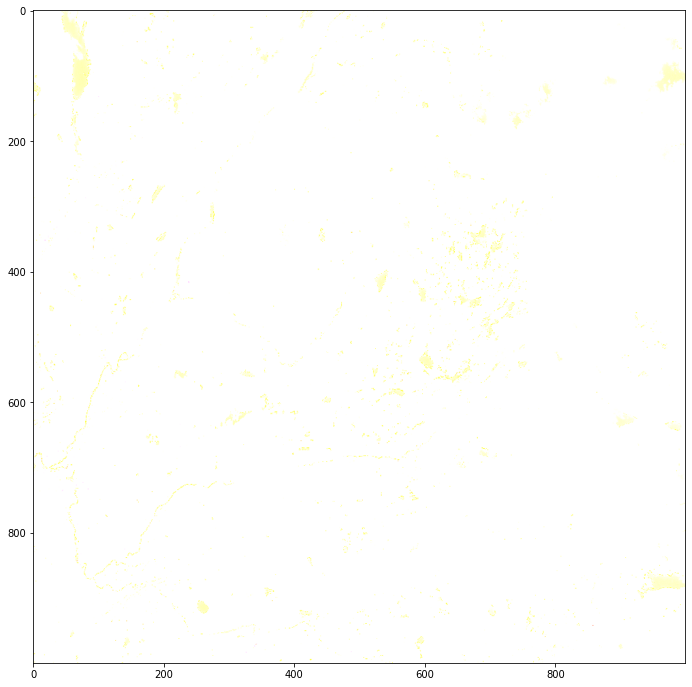

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(images[0][:,:,[2,3,7]], interpolation='bilinear')

In [ ]:
images[0].shape

(1000, 1000, 13)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


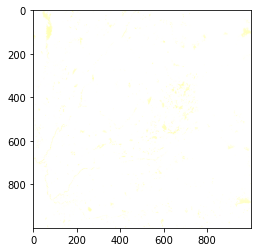

In [ ]:
plt.imshow(images[0][:,:,[2,3,7]])

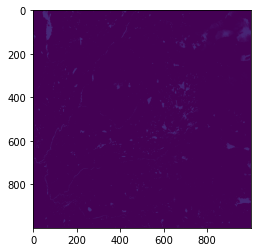

In [ ]:
image_B04 = images[0][:, :, 3]
image_B08 = images[0][:, :, 7]

image_ndvi = GetNDVI(image_B04, image_B08)

plt.imshow(image_ndvi)

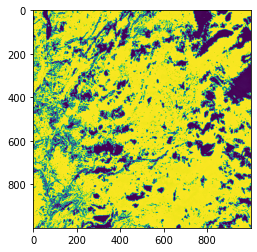

In [ ]:
image_B04 = images[0][:, :, 3]
image_B05 = images[0][:, :, 4]
image_B08 = images[0][:, :, 7]
image_B11 = images[0][:, :, 11]

image_fdi = GetFDI(image_B04, image_B05, image_B08, image_B11)

plt.imshow(image_fdi)

In [ ]:
output = {}
output['date'] = dates
output['geometry'] = geometries
output['property'] = properties
output['image'] = images
output['ndvi'] = ndvi
output['fdi'] = fdi

df_output = pd.DataFrame.from_dict(output)
df_output.head(5)

,date,geometry,property,image,ndvi,fdi
0,2021-09-17,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",{'id': 'S2B_OPER_MSI_L1C_TL_VGS4_20210917T1134...,"[[[1452, 1078, 846, 797, 932, 1329, 1578, 1510...","[[0.30905938448201126, 0.43293591654247393, 0....","[[-10579.52, -10698.64, -12360.0, -6780.119999..."
1,2021-09-15,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",{'id': 'S2A_OPER_MSI_L1C_TL_VGS2_20210915T1126...,"[[[1321, 1006, 776, 698, 924, 1321, 1476, 1475...","[[0.35757017947537967, 0.4498567335243553, 0.3...","[[-8545.16, -8304.88, -12525.759999999998, -37..."
2,2021-09-15,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",{'id': 'S2A_OPER_MSI_L1C_TL_VGS2_20210915T1126...,"[[[1321, 1006, 776, 698, 924, 1321, 1476, 1475...","[[0.35757017947537967, 0.4498567335243553, 0.3...","[[-8545.16, -8304.88, -12525.759999999998, -37..."
3,2021-09-04,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",{'id': 'S2B_OPER_MSI_L1C_TL_VGS4_20210904T1143...,"[[[3084, 3026, 2529, 2269, 2193, 2459, 2572, 3...","[[0.19950608572940554, 0.09833841980332315, 0....","[[994.3200000000002, -1071277.2, -1071300.16, ..."
4,2021-08-28,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",{'id': 'S2B_OPER_MSI_L1C_TL_VGS4_20210828T1146...,"[[[1374, 1065, 877, 756, 955, 1516, 1793, 1819...","[[0.4128155339805825, 0.4985185185185185, 0.46...","[[-14269.0, -13652.759999999998, -19585.48, -6..."


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


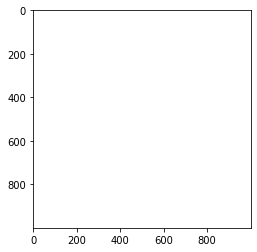

In [ ]:
plt.imshow(df_output.iloc[0]['image'][:,:,[1,2,3]])